# A. Final Project 3 kelompok 3
---
Pada saat ini, persaingan antar bank semakin tinggi membuat setiap perusahaan harus menyiapkan strategi pemasaran produk perbankannya dengan matang. Segmentasi pasar termasuk salah satu strategi dalam dunia bisnis dengan mengelompokkan produk yang dimiliki sesuai dengan kesamaan, kemiripan, minat serta kebutuhan pelanggan. Strategi pemasaran yang tepat dengan menetapkan segmentasi pasar yang sesuai sasaran akan mempengaruhi pertumbuhan kreditnya.

### Anggota kelompok : <br>
<ol>
<li>Alif Faqiih             PYTN-KS12-024</li>
<li>Syarif Khoirul Al Fian  PYTN-KS12-009</li>
<li>Marcel Afandi           PYTN-KS12-018</li>
<ol>


# B. Library yang digunakan

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import PowerTransformer
from yellowbrick.cluster import KElbowVisualizer
from pywaffle import Waffle

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA 
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
class clr:
    start = '\033[93m'+'\033[1m'
    color = '\033[93m'
    end = '\033[0m'

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# C. Data Loading

In [75]:
df = pd.read_csv("D:\semester 6\proakh\data\CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [76]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [77]:
df.shape

(8950, 18)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [79]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [80]:
df['TENURE'].unique()

array([12,  8, 11,  9, 10,  7,  6], dtype=int64)

# D. Data Cleaning

Melakukan pengecekan apakah terdapat missing value

In [81]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Terdapat missing value pada CREDIT_LIMIT sebanyak 1 data, dan MINIMUM_PAYMENT sebanyak 313. Untuk CREDIT LIMIT kita hapus saja karena data yang missing hanya 1 namun kita isi data MINIMUM PAYMENT

In [82]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(),inplace=True)
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

In [83]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Karena sudah tidak terdapat missing value, maka akan dicek apakah terdapat data yang duplikat pada dataset.

In [84]:
df.duplicated().sum()

0

 # E. Explorating Data

## menghilangkan kolom Customer ID
Hal ini dilakukan karena kolom customer id tidak dibutuhkan dalam clustering

In [85]:
data = df.drop('CUST_ID', axis=1)
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Menentukan pembayaran minimal dan maksimal pada jangka waktu layanan kartu kredit pengguna selama 12 bulan

In [86]:
data.loc[data['TENURE'] == 12, 'PURCHASES'].agg(('min', 'max'))

min        0.00
max    49039.57
Name: PURCHASES, dtype: float64

Text(0.5, 1.0, 'Credit Limit vs Balance')

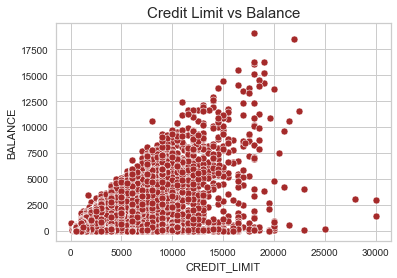

In [87]:
sns.scatterplot(x='CREDIT_LIMIT', y='BALANCE', data=data, color='brown')
plt.title("Credit Limit vs Balance", fontsize= 15)

Scatter plot di atas menunjukkan bahwa saat nilai variabel meningkat, varians distribusi juga ikut meningkat hingga membentuk seperti kerucut. Oleh karenanya, didapatkan bahwa terdapat korelasi positif antara CREDIT LIMIT dengan BALANCE.

In [88]:
def scatter_purchases(x):
    sns.scatterplot(y='PURCHASES',x=x,data = data,color='#171820',alpha=0.7)

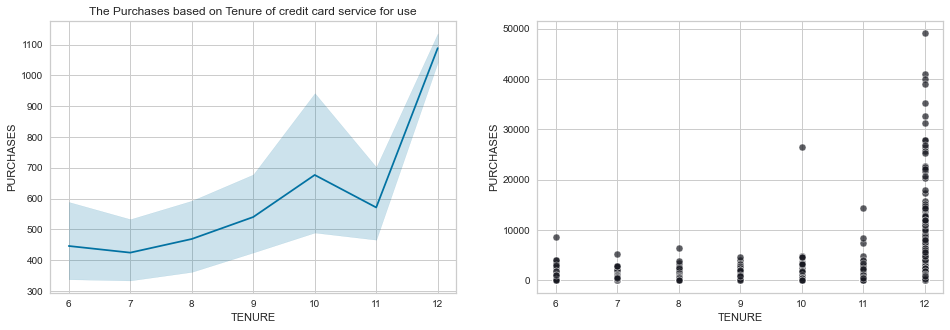

In [89]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.lineplot(x='TENURE',y='PURCHASES',data=df)
plt.title('The Purchases based on Tenure of credit card service for use')
plt.subplot(1,2,2)
scatter_purchases('TENURE')

# F. Data Preprocessing

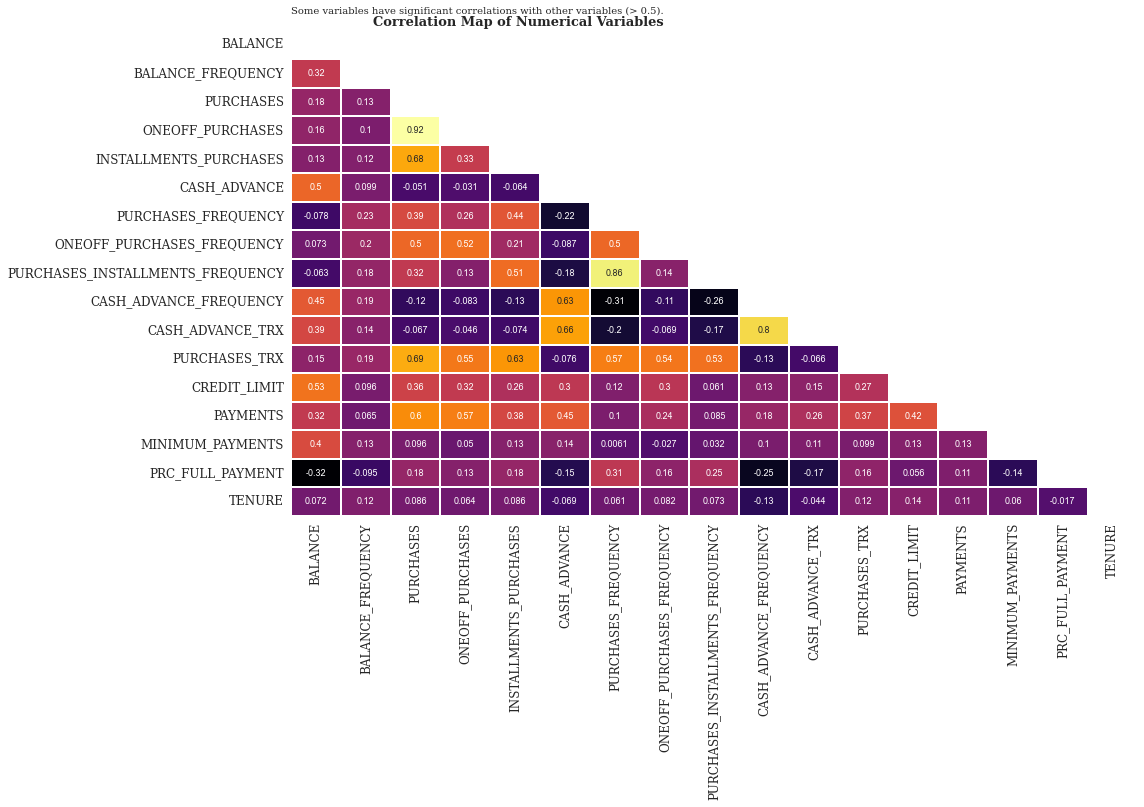

In [90]:
# --- Correlation Map (Heatmap) ---
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(df.corr(), mask=mask, annot=True, cmap='inferno', linewidths=0.1, cbar=False, annot_kws={"size":9})
yticks, ylabels = plt.yticks()
xticks, xlabels = plt.xticks()
ax.set_xticklabels(xlabels, size=12, fontfamily='serif')
ax.set_yticklabels(ylabels, size=12, fontfamily='serif')
plt.suptitle('Correlation Map of Numerical Variables', fontweight='heavy', x=0.327, y=0.96, ha='left', fontsize=13, fontfamily='serif')
plt.title('Some variables have significant correlations with other variables (> 0.5).\n', fontsize=10, fontfamily='serif', loc='left')
plt.tight_layout(rect=[0, 0.04, 1, 1.01])
plt.show();

In [91]:
#Scaling
scaling = StandardScaler()
scaling.fit(data)
scaling_data = pd.DataFrame(scaling.transform(data),columns= data.columns )

In [92]:
mm = MinMaxScaler()
train_data = mm.fit_transform(scaling_data)
test_data = mm.transform(scaling_data)

In [93]:
pt = PowerTransformer()
train_data = pt.fit_transform(train_data)
test_data = pt.transform(test_data)

# G. Modeling

## 1. KMeans

In [94]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(scaling_data)
labels = kmeans.labels_ 

kmeans.cluster_centers_.shape

(4, 17)

K-MEANS CLUSTERING
- Melihat Jumlah clusters yang optimal dengan menggunakan elbow method

In [95]:
pca = PCA(n_components=2)
pca.fit(train_data)
PCA_ds = pd.DataFrame(pca.transform(train_data), columns=(["Principal Component 1", "Principal Component 2"]))
PCA_ds.head()

,Principal Component 1,Principal Component 2
0,-1.199285,-3.053813
1,-3.002629,1.935552
2,1.264357,0.827282
3,-0.685620,-0.244870
4,-1.428338,-1.780792


In [96]:
pca.explained_variance_ratio_

array([0.33729773, 0.23992862])

Metode Elbow untuk menentukan jumlah cluster yang akan dibentuk:


KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=10))

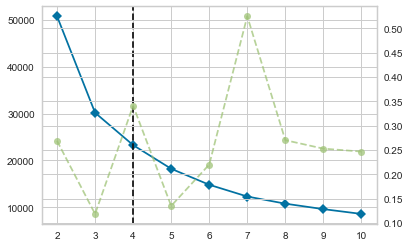

In [97]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Metode Elbow untuk menentukan jumlah cluster yang akan dibentuk:')
Elb = KElbowVisualizer(KMeans(), k=10)
Elb.fit(PCA_ds)

Melatih model KMeans dengan n_clusters sebanyak 4

In [98]:
km = KMeans(n_clusters = 4,init ='k-means++', max_iter=300,random_state=42)
km.fit(scaling_data)
y_balance_pred = km.predict(scaling_data)

Menambahkan KMeans Segment pada dataframe

In [100]:
data_kmeans = data.copy()
data_kmeans['KMeansSegment'] = km.labels_

Melihat informasi data KMeans dengan melakukan groupby berdasarkan rata-rat KMeans segment

In [101]:
data_transf_kmeans = data_kmeans.groupby('KMeansSegment').mean()
data_transf_kmeans

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
KMeansSegment,,,,,,,,,,,,,,,,,
0,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1972.767288,0.286707,11.951100
1,1012.995969,0.790134,270.281184,210.068828,60.479311,597.154288,0.170292,0.086343,0.080662,0.114888,2.126226,2.907971,3278.263348,975.328059,554.004182,0.078002,11.448076
2,4602.449658,0.968389,501.862982,320.188797,181.759123,4521.509581,0.287832,0.138911,0.185671,0.484792,14.294904,7.665831,7546.160857,3484.054216,2003.674460,0.034888,11.386800
3,894.768927,0.934715,1236.263333,593.995933,642.541696,209.816318,0.885255,0.297109,0.711930,0.042487,0.789067,22.092692,4214.013741,1331.325429,639.740452,0.269313,11.594474


Dari hasil grouping segment KMeans, selanjutnya kami mencoba membuat kesimpulan tentang segment tersebut dan memberi nama pada segment tersebut.

Disini Penarikan Tunai berkaitan dengan penggunaan kartu kredit dengan penarikan tunai yang biasanya dikenakan biaya dan memiliki tingkat bunga.

- Melakukan pemberian nama pada segment

In [102]:
data_transf_kmeans.rename({0:'Pengguna Level Tengah (Middle Ground)', 
                           1:'Pengguna dengan Pembelian Kredit Tinggi (High Credit Frequent Purchasers)', 
                           2:'Pengguna dengan Penarikan Tunai Tinggi (High Cash Advance Users)', 
                           3:'Pengguna Kredit Hemat (Frugal Credit Users)'})

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
KMeansSegment,,,,,,,,,,,,,,,,,
Pengguna Level Tengah (Middle Ground),3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1972.767288,0.286707,11.951100
Pengguna dengan Pembelian Kredit Tinggi (High Credit Frequent Purchasers),1012.995969,0.790134,270.281184,210.068828,60.479311,597.154288,0.170292,0.086343,0.080662,0.114888,2.126226,2.907971,3278.263348,975.328059,554.004182,0.078002,11.448076
Pengguna dengan Penarikan Tunai Tinggi (High Cash Advance Users),4602.449658,0.968389,501.862982,320.188797,181.759123,4521.509581,0.287832,0.138911,0.185671,0.484792,14.294904,7.665831,7546.160857,3484.054216,2003.674460,0.034888,11.386800
Pengguna Kredit Hemat (Frugal Credit Users),894.768927,0.934715,1236.263333,593.995933,642.541696,209.816318,0.885255,0.297109,0.711930,0.042487,0.789067,22.092692,4214.013741,1331.325429,639.740452,0.269313,11.594474


- Memasukkan Label KMeans Segment ke dalam dataframe dengan membuat kolom baru

In [103]:
data_kmeans['Labels'] = data_kmeans['KMeansSegment'].map({0:'Pengguna Level Tengah (Middle Ground)', 
                                                           1:'Pengguna dengan Kredit Pembelian Tinggi (High Credit Frequent Purchasers)', 
                                                           2:'Pengguna dengan Penarikan Tunai Tinggi (High Cash Advance Users)', 
                                                           3:'Pengguna Kredit Hemat (Frugal Credit Users)'})

data_kmeans.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,KMeansSegment,Labels
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1,Pengguna dengan Kredit Pembelian Tinggi (High ...
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2,Pengguna dengan Penarikan Tunai Tinggi (High C...
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3,Pengguna Kredit Hemat (Frugal Credit Users)
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,1,Pengguna dengan Kredit Pembelian Tinggi (High ...
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1,Pengguna dengan Kredit Pembelian Tinggi (High ...


Analisis Segment K-Means

Disini dilakukan plotting atribut pada segment KMeans yang membagi data serta melihat perbedaan antara segmen pelanggan.

### a. Transaksi Pembelian vs Pembelian

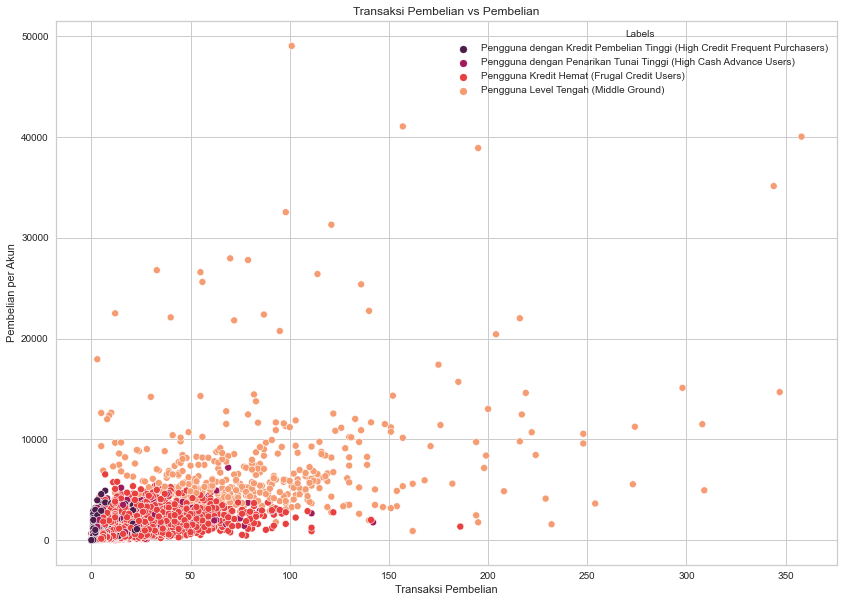

In [104]:
#sekarang kita dapat mengilustrasikan grup berdasarkan beberapa fitur dalam scatterplot

plt.figure(figsize=(14,10))
X = data_kmeans['PURCHASES_TRX']
Y = data_kmeans['PURCHASES']
g = sns.scatterplot(x=X, y=Y, hue = data_kmeans['Labels'], palette = 'rocket')
g.set_xlabel('Transaksi Pembelian')
g.set_ylabel('Pembelian per Akun')
g.set_title('Transaksi Pembelian vs Pembelian')
plt.show()

### b. Saldo Akun vs Pembelian

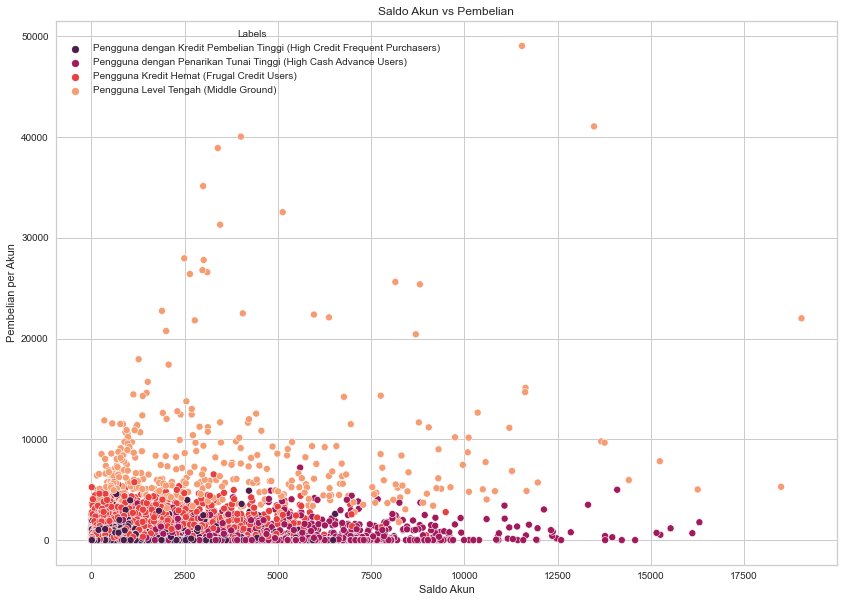

In [105]:
plt.figure(figsize=(14,10))
X = data_kmeans['BALANCE']
Y = data_kmeans['PURCHASES']
g = sns.scatterplot(x=X, y=Y, hue = data_kmeans['Labels'], palette = 'rocket')
g.set_xlabel('Saldo Akun')
g.set_ylabel('Pembelian per Akun')
g.set_title('Saldo Akun vs Pembelian')
plt.show()

### c. Tingkat Frekuensi Pembelian vs Transaksi Pembelian 

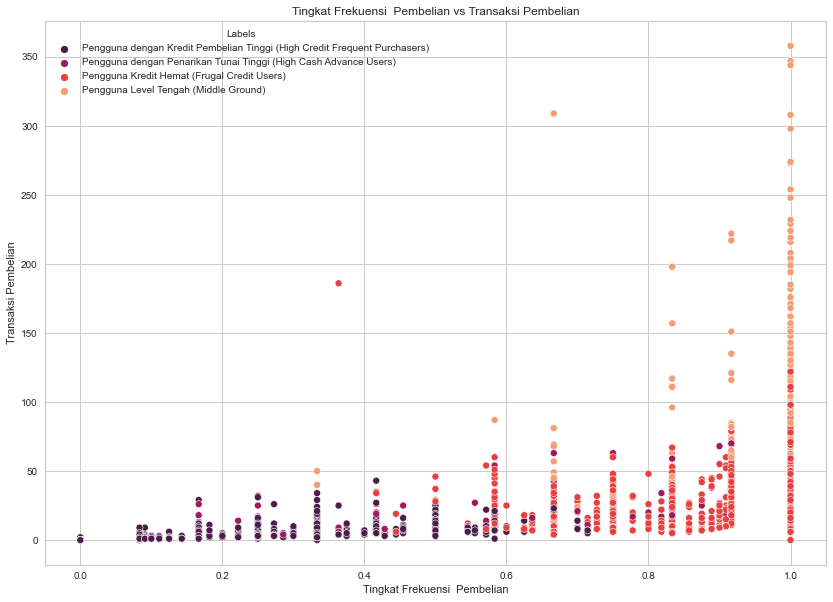

In [106]:
plt.figure(figsize=(14,10))
X = data_kmeans['PURCHASES_FREQUENCY']
Y = data_kmeans['PURCHASES_TRX']
g = sns.scatterplot(x=X, y=Y, hue = data_kmeans['Labels'], palette = 'rocket')
g.set_xlabel('Tingkat Frekuensi  Pembelian')
g.set_ylabel('Transaksi Pembelian')
g.set_title('Tingkat Frekuensi  Pembelian vs Transaksi Pembelian')
plt.show()

### d. Batas Kredit Akun vs Batas Kredit Akun vs Pembelian per Akun

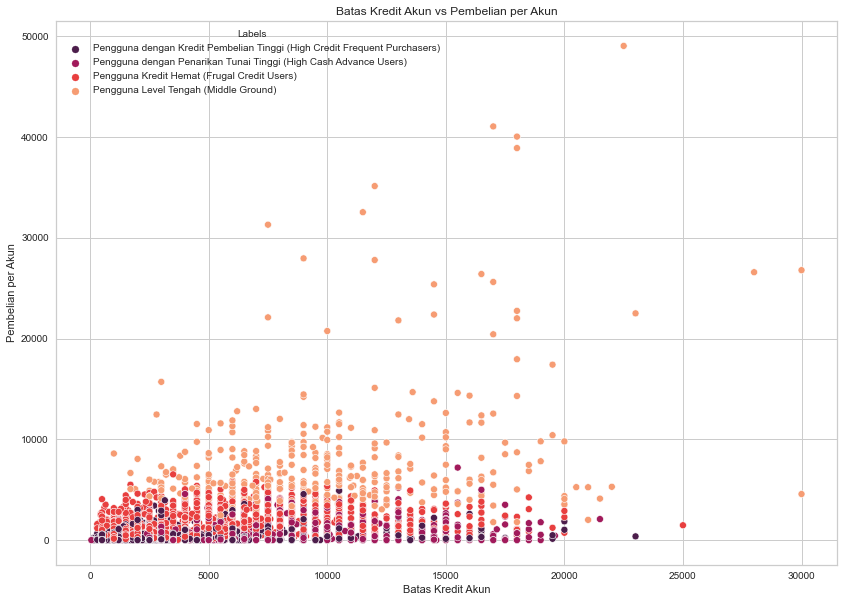

In [107]:
plt.figure(figsize=(14,10))
X = data_kmeans['CREDIT_LIMIT']
Y = data_kmeans['PURCHASES']
g = sns.scatterplot(x=X, y=Y, hue = data_kmeans['Labels'], palette = 'rocket')
g.set_xlabel('Batas Kredit Akun')
g.set_ylabel('Pembelian per Akun')
g.set_title('Batas Kredit Akun vs Pembelian per Akun')
plt.show()

### e. Jumlah Persentase dari tiap Cluster menggunakan Diagram Waffle 

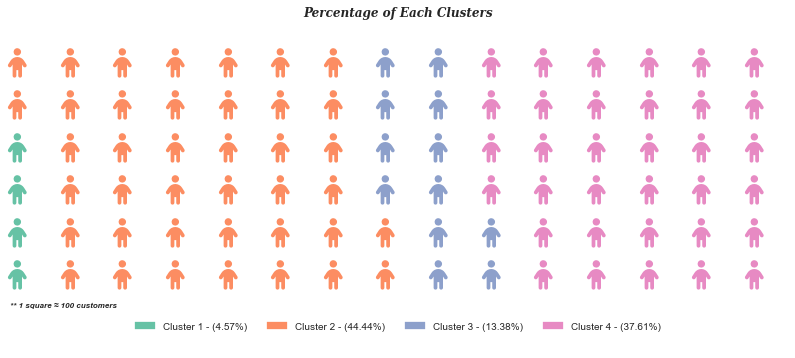

In [108]:
# --- Define K-Means Visualizer & Plots ---
def visualizer(kmeans, km):
    # --- Figures Settings ---
    
    labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
    title=dict(fontsize=12, fontweight='bold', style='italic', fontfamily='serif')
    text_style=dict(fontweight='bold', fontfamily='serif')
    scatter_style=dict(linewidth=0.65, edgecolor='#100C07', alpha=0.85)
    legend_style=dict(borderpad=2, frameon=False, fontsize=8)
    fig, ((ax3, ax4)) = plt.subplots(1, 2, figsize=(14, 10))
    
    # --- Waffle Chart ---
    unique, counts = np.unique(km, return_counts=True)
    df_waffle = dict(zip(unique, counts))
    total = sum(df_waffle.values())
    wfl_square = {key: value/100 for key, value in df_waffle.items()}
    wfl_label = {key: round(value/total*100, 2) for key, value in df_waffle.items()}

    ax3=plt.subplot(2, 2, (3,4))
    ax3.set_title('Percentage of Each Clusters\n', **title)
    ax3.set_aspect(aspect='auto')
    Waffle.make_waffle(ax=ax3, rows=6, values=wfl_square, 
                       labels=[f"Cluster {i+1} - ({k}%)" for i, k in wfl_label.items()], icons='child', icon_size=30, 
                       legend={'loc': 'upper center', 'bbox_to_anchor': (0.5, -0.05), 'ncol': 4, 'borderpad': 2, 
                               'frameon': False, 'fontsize':10})
    ax3.text(0.01, -0.09, '** 1 square ≈ 100 customers', weight = 'bold', style='italic', fontsize=8)
    
# --- Calling K-Means Functions ---
visualizer(kmeans, y_balance_pred);

Plot diatas merupakan persebaran dari:

<ol>
<li>Pengguna Level Tengah (Middle Ground)</li>
<li>Pengguna dengan Pembelian Kredit Tinggi (High Credit Frequent Purchasers)</li>
<li>Pengguna dengan Penarikan Tunai Tinggi (High Cash Advance Users)</li>
<li>Pengguna Kredit Hemat (Frugal Credit Users)</li>
<ol> 

## Clustermap tiap atribut

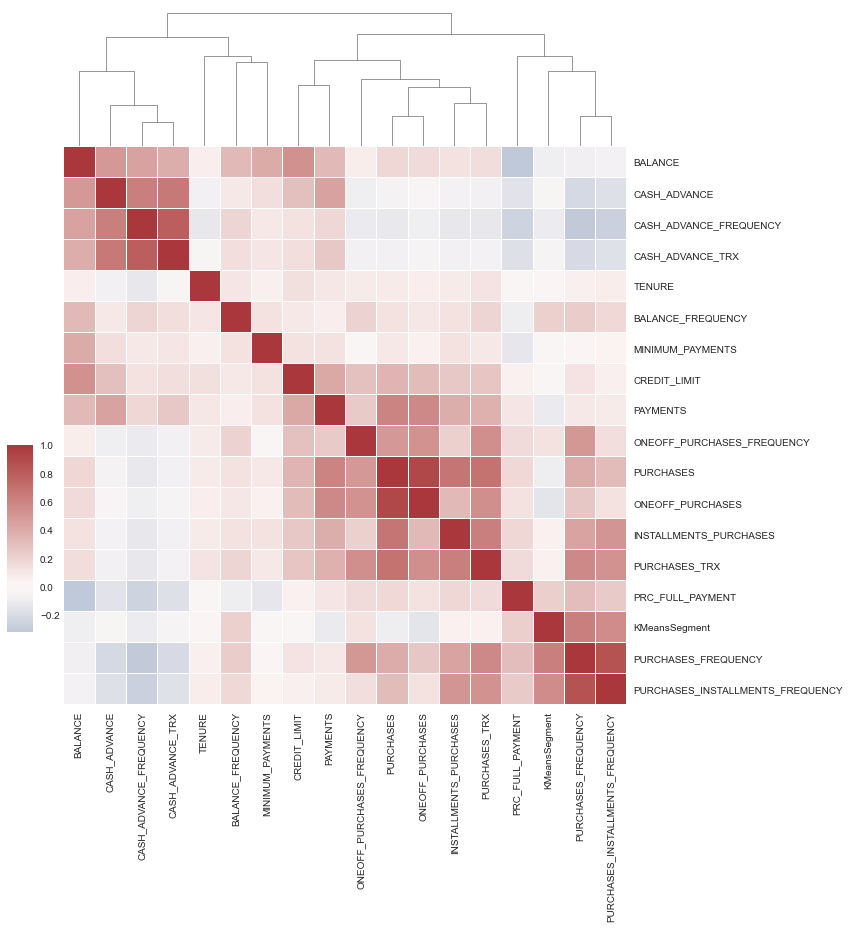

In [109]:
# Full Plot
g = sns.clustermap(data_kmeans.corr(), center=0, cmap="vlag",
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

# Remove ax row
g.ax_row_dendrogram.remove()

## 2. DBSCAN

Pada DBSCAN optimalnya hanya dapat menggunakan 2 Clustering, disini untuk perbandingannya menggunakan BALANCE dan PURCHASES

In [110]:
dbscan = DBSCAN(eps=2,min_samples=6)
dbscan.fit(train_data)
y_dbscan_pred = dbscan.labels_
y_dbscan_pred

array([ 0,  0,  0, ...,  1,  1, -1], dtype=int64)

In [111]:
dbscan_df = pd.DataFrame(train_data,columns = data.columns)
dbscan_df['clusters'] = y_dbscan_pred
dbscan_df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,-1.130205,-1.080160,-0.817024,-0.772571,-0.411977,-0.759974,-0.767073,-0.903388,-0.606798,-0.879453,-0.812897,-0.803957,-1.330416,-1.105022,-0.878430,-0.677937,0.421965,0
1,1.277020,-0.425620,-1.035491,-0.772571,-0.870926,1.987074,-1.278999,-0.903388,-1.004536,1.121940,0.890871,-1.113340,0.997160,1.631981,1.062506,1.234846,0.421965,0
2,1.009352,0.628527,0.350373,1.055514,-0.870926,-0.759974,1.218811,1.732520,-1.004536,-0.879453,-0.812897,0.335752,1.096205,-0.506653,0.357008,-0.677937,0.421965,0
3,0.555914,-1.711452,1.086087,1.706679,-0.870926,-0.344217,-1.016108,-0.092379,-1.004536,0.118221,-0.224622,-0.954529,1.096205,-1.440424,-0.370124,-0.677937,0.421965,0
4,-0.149149,0.628527,-0.997724,-0.713200,-0.870926,-0.759974,-1.016108,-0.092379,-1.004536,-0.879453,-0.812897,-0.954529,-1.199039,-0.435661,-0.558350,-0.677937,0.421965,0
5,0.647929,0.628527,0.951564,-0.772571,1.787168,-0.759974,0.511211,-0.903388,0.801350,-0.879453,-0.812897,-0.050140,-0.836760,0.319132,1.995352,-0.677937,0.421965,0
6,-0.353979,0.628527,2.112936,2.146396,1.196196,-0.759974,1.218811,1.732520,1.377088,-0.879453,-0.812897,1.944335,1.810187,1.966198,-0.696229,1.873568,0.421965,0
7,0.656475,0.628527,-0.155038,-0.772571,0.710462,-0.759974,1.218811,-0.903388,1.377088,-0.879453,-0.812897,0.335752,-0.567739,-0.434753,0.160767,-0.677937,0.421965,0
8,0.042732,0.628527,0.462816,0.890221,0.008053,-0.759974,-0.304290,-0.092379,0.007940,-0.879453,-0.812897,-0.397318,0.997160,-0.423321,-0.371149,-0.677937,0.421965,0
9,-0.963646,-1.845931,0.906082,1.569986,-0.870926,-0.759974,-0.767073,0.445525,-1.004536,-0.879453,-0.812897,-0.661176,1.594157,0.101964,-1.006572,-0.677937,0.421965,0


In [112]:
dbscan_df['clusters'].value_counts()

 0    7397
 1    1166
-1     377
 2       9
Name: clusters, dtype: int64

In [113]:
X = dbscan_df[['BALANCE','PURCHASES']].to_numpy()

In [114]:
dbscan_df['clusters'] = y_dbscan_pred
dbscan_df['clusters'].value_counts()

 0    7397
 1    1166
-1     377
 2       9
Name: clusters, dtype: int64

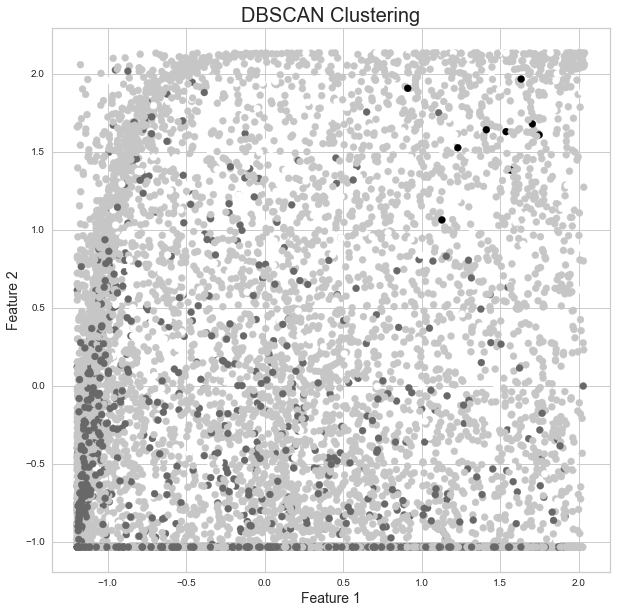

In [115]:
plt.figure(figsize=(10,10))
plt.scatter(dbscan_df['BALANCE'],dbscan_df['PURCHASES'],c=dbscan_df['clusters'])
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

# H. Evaluation

Menggunakan 3 Evaluasi Clustering diantaranya davies_bouldin_score, silhouette_score, calinski_harabasz_score

In [116]:
# --- Evaluate Clustering Quality Function ---
def evaluate_clustering(X, y):
    db_index = round(davies_bouldin_score(X, y), 3)
    s_score = round(silhouette_score(X, y), 3)
    ch_index = round(calinski_harabasz_score(X, y), 3)
    print(clr.start+'.: Evaluate Clustering Quality :.'+clr.end)
    print(clr.color+'*' * 34+clr.end)
    print('.: Davies-Bouldin Index: '+clr.start, db_index)
    print(clr.end+'.: Silhouette Score: '+clr.start, s_score)
    print(clr.end+'.: Calinski Harabasz Index: '+clr.start, ch_index)
    return db_index, s_score, ch_index

In [117]:
# --- Evaluate K-Means Cluster Quality ---
db_kmeans, ss_kmeans, ch_kmeans = evaluate_clustering(scaling_data, y_balance_pred)

.: Evaluate Clustering Quality :.
**********************************
.: Davies-Bouldin Index:  1.575
.: Silhouette Score:  0.198
.: Calinski Harabasz Index:  1597.751


In [118]:
db_dbscan, ss_dbscan, ch_dbscan = evaluate_clustering(X, y_dbscan_pred)

.: Evaluate Clustering Quality :.
**********************************
.: Davies-Bouldin Index:  3.14
.: Silhouette Score:  -0.194
.: Calinski Harabasz Index:  107.698


In [119]:
# --- Comparison Table ---
compare = pd.DataFrame({'Model': ['K-Means', 'DBSCAN'], 
                        'Davies-Bouldin Index': [db_kmeans, db_dbscan],
                        'Silhouette Score': [ss_kmeans, ss_dbscan],
                       'Calinski-Harabasz Index': [ch_kmeans, ch_dbscan]})

# --- Create Accuracy Comparison Table ---
print(clr.start+'.: Model Accuracy Comparison :.'+clr.end)
print(clr.color+'*' * 32+clr.end)
compare.sort_values(by='Model', ascending=False).style.background_gradient(cmap='inferno_r').hide_index().set_properties(**{'font-family': 'Segoe UI'})

.: Model Accuracy Comparison :.
********************************


Model,Davies-Bouldin Index,Silhouette Score,Calinski-Harabasz Index
K-Means,1.575000,0.198000,1597.751000
DBSCAN,3.140000,-0.194000,107.698000


# I. KESIMPULAN